Import Libraries

In [48]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import sklearn


In [49]:
df = pd.read_csv("/content/UPI_DATA_SET.csv")

In [50]:
df.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20-04-2023,04:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08-08-2023,08:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25-06-2023,07:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28-01-2024,05:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21-06-2023,09:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                647 non-null    object 
 1   Date                          647 non-null    object 
 2   Time                          647 non-null    object 
 3   Merchant_ID                   647 non-null    object 
 4   Customer_ID                   647 non-null    object 
 5   Device_ID                     647 non-null    object 
 6   Transaction_Type              647 non-null    object 
 7   Payment_Gateway               647 non-null    object 
 8   Transaction_City              647 non-null    object 
 9   Transaction_State             647 non-null    object 
 10  IP_Address                    647 non-null    object 
 11  Transaction_Status            647 non-null    object 
 12  Device_OS                     647 non-null    object 
 13  Trans

In [52]:
df.describe()

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
count,647.000000,647.000000,647.000000,647.000000,647.000000
mean,3.564142,5.014668,15.717156,128.839753,0.239567
std,6.454543,56.375914,8.218122,364.995747,0.427150
min,0.000000,-99.470000,1.000000,0.120000,0.000000
25%,1.000000,-42.355000,8.500000,17.155000,0.000000
50%,2.000000,8.380000,16.000000,35.000000,0.000000
75%,3.000000,52.290000,23.000000,74.770000,0.000000
max,50.000000,99.450000,29.000000,4883.620000,1.000000


In [53]:
df.isnull().sum()

,0
Transaction_ID,0
Date,0
Time,0
Merchant_ID,0
Customer_ID,0
Device_ID,0
Transaction_Type,0
Payment_Gateway,0
Transaction_City,0
Transaction_State,0


In [54]:
df.duplicated().sum()

np.int64(0)

In [55]:

df["Date"] = pd.to_datetime(df["Date"]).astype('datetime64[ns]')
df["Year"]=pd.to_datetime(df["Date"]).dt.year
df["Month"]=pd.to_datetime(df["Date"]).dt.month
months = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
df["Month"]=df["Month"].map(months)
#now my data has two more cols that are month and year


/tmp/ipython-input-55-600926700.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [56]:

df.drop(columns=["Transaction_ID","Date","Time","Merchant_ID","Customer_ID","Device_ID"],inplace=True)
df.drop(columns=["IP_Address"],inplace=True)


In [57]:

fig = px.bar(x=df["fraud"].value_counts().index,
             y=df["fraud"].value_counts().values,
             color=df["fraud"].value_counts().index,
             labels={"x":'Fraudlent_Transactions',"y":"Count of fraud"},
             title="Fraud Visualization")
fig.show()


Feature-wise Fraud Distribution

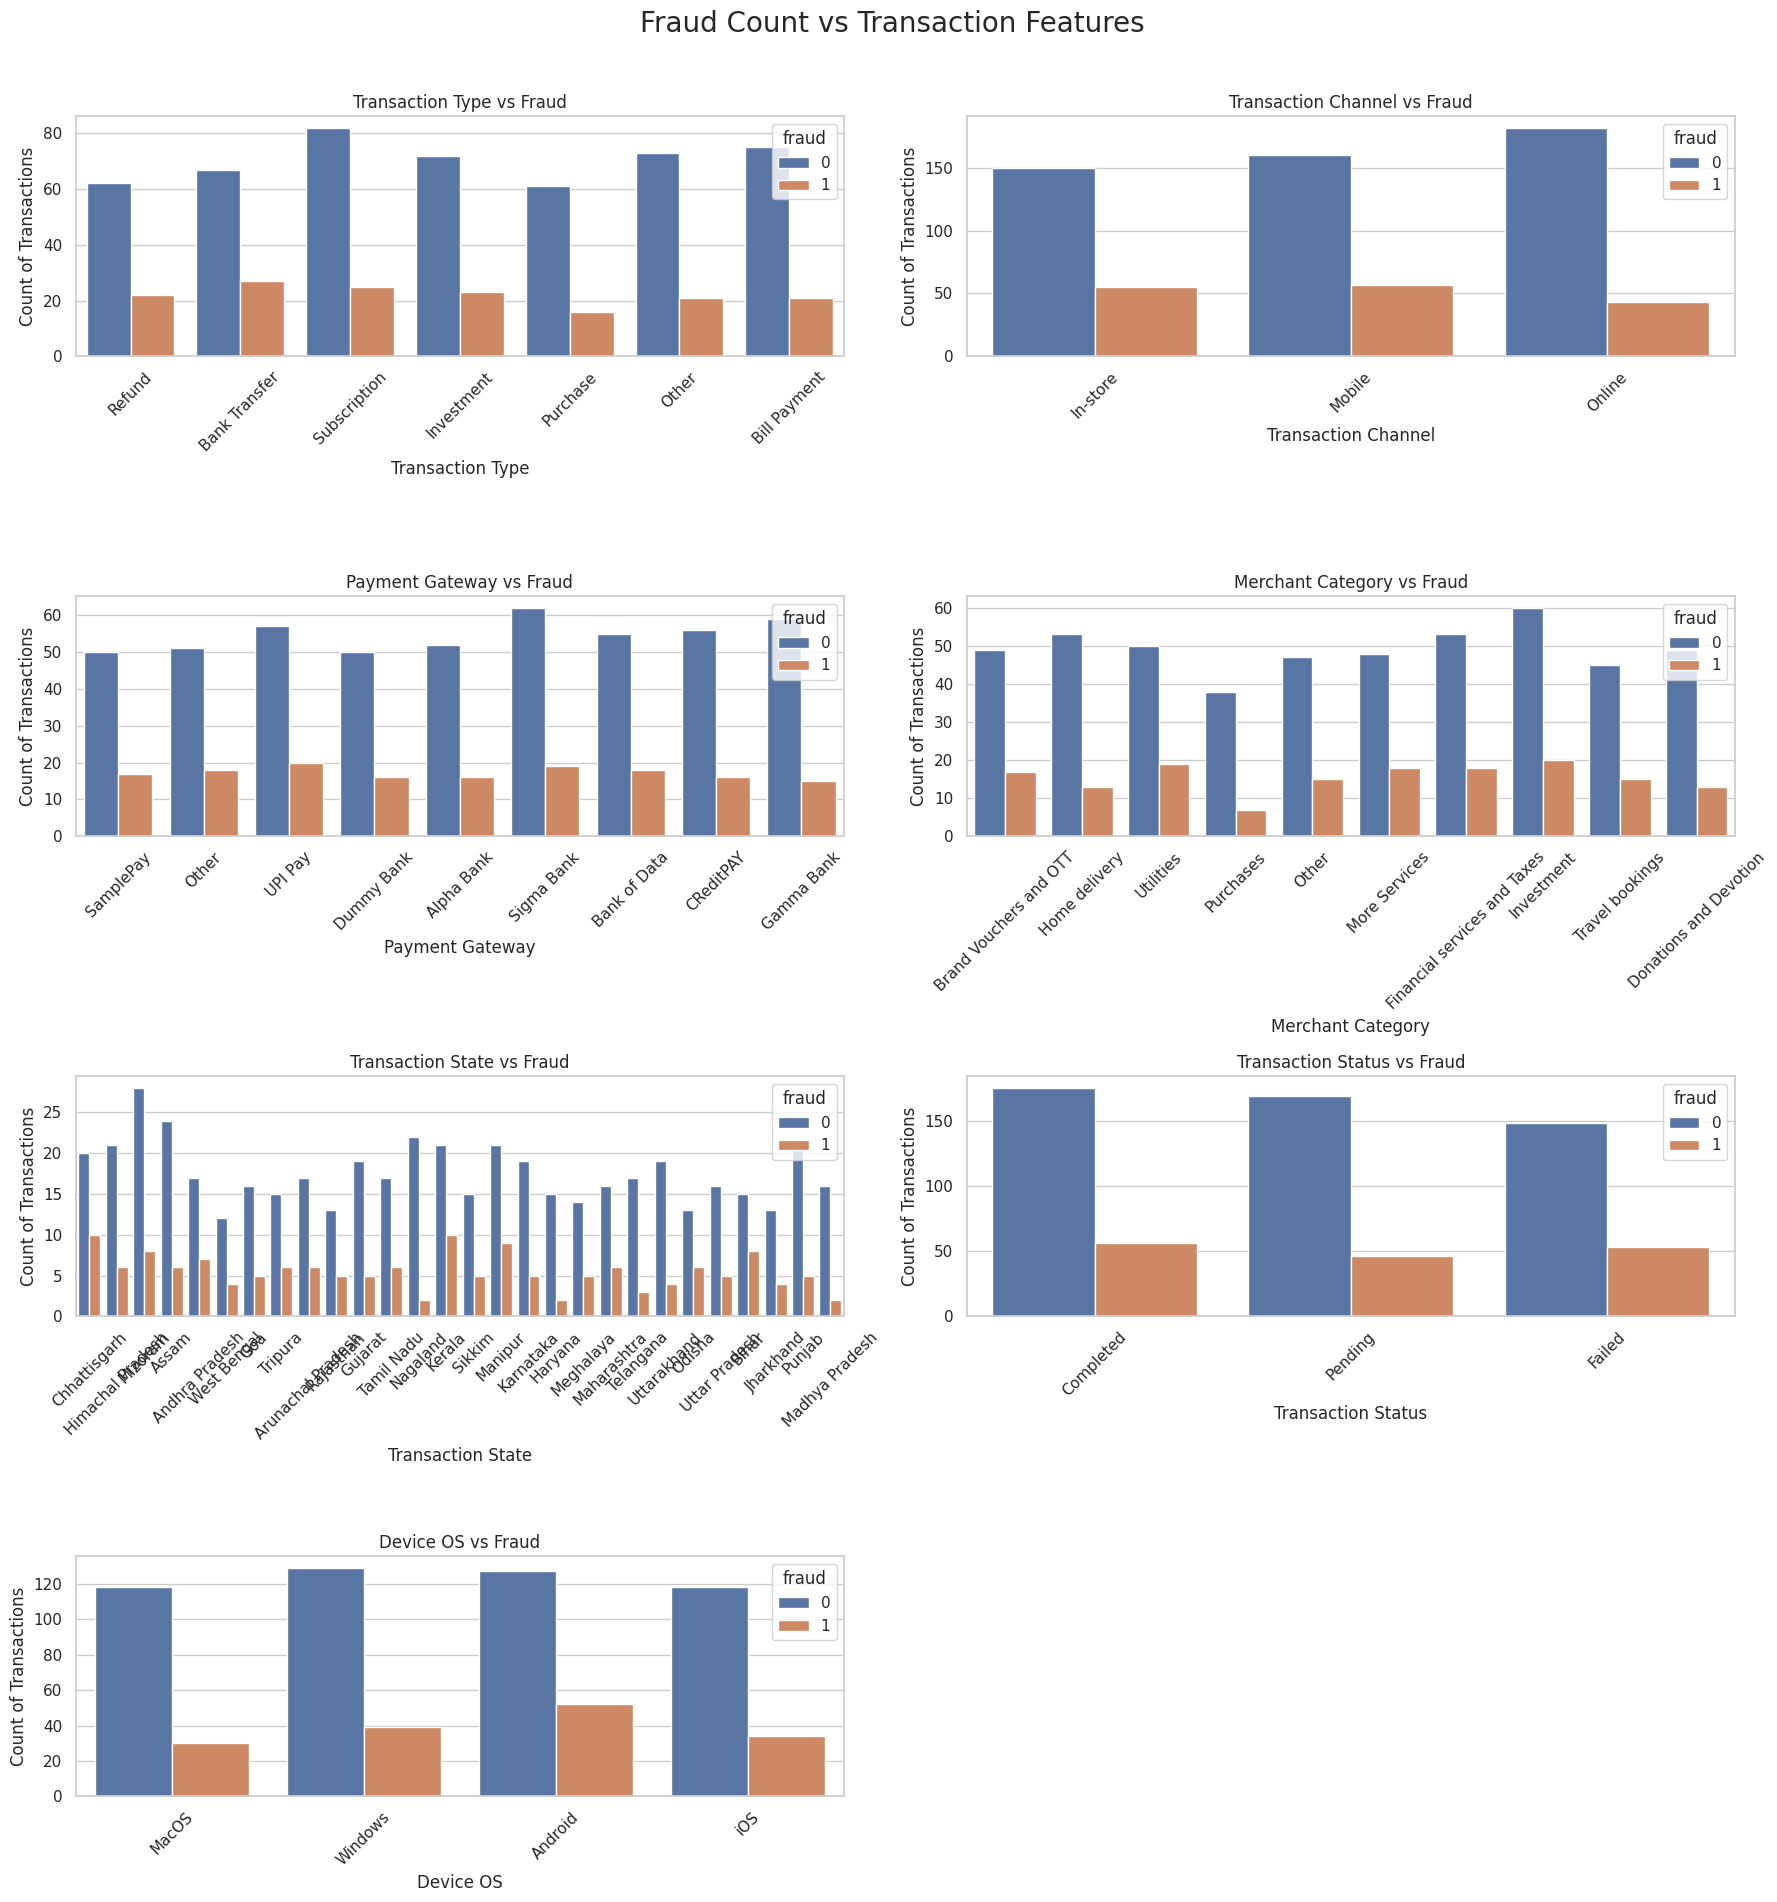

In [58]:

features = ["Transaction_Type", "Transaction_Channel","Payment_Gateway","Merchant_Category", "Transaction_State", "Transaction_Status", "Device_OS"]
plt.figure(figsize=(18, 20))
plt.suptitle("Fraud Count vs Transaction Features", fontsize=20)
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=feature, hue="fraud")#this is used to create a barchat for each feature separated by the fraud lebel
    plt.xlabel(feature.replace("_", " "))
    plt.ylabel("Count of Transactions")
    plt.title(f"{feature.replace('_', ' ')} vs Fraud")
    plt.xticks(rotation=45) #used to rotate the x-axis lebel by 45 degree to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.97]) #used to adjust the subplot spacing
plt.show()


Drop Additional Columns

In [59]:

df.drop(columns=["Transaction_City","Device_OS","Transaction_Frequency","Transaction_Amount_Deviation",
                 "Days_Since_Last_Transaction","Transaction_Status","Transaction_Channel"],inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   647 non-null    object 
 1   Payment_Gateway    647 non-null    object 
 2   Transaction_State  647 non-null    object 
 3   Merchant_Category  647 non-null    object 
 4   amount             647 non-null    float64
 5   fraud              647 non-null    int64  
 6   Year               647 non-null    int32  
 7   Month              647 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 38.0+ KB


label Encoding and One-Hot Encoding

In [60]:

df1 = df.copy()
df1["Year"] = df1["Year"].astype("object")
from sklearn.preprocessing import LabelEncoder
cols = ["Year","Month"]
le = LabelEncoder()
for col in cols:
    df1[col] = le.fit_transform(df1[col])
non_ordinal = ["Transaction_Type","Payment_Gateway","Transaction_State","Merchant_Category"]
df1 = pd.get_dummies(data=df1,columns=non_ordinal,drop_first=True)
df1 = df1.astype("int")


Data Split and Scaling

In [61]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df1.drop(columns="fraud")
y = df1["fraud"]
from imblearn.over_sampling import SMOTE #synthetic minority oversampling technique to generate synthetic data points for minority class
X_res,y_res = SMOTE().fit_resample(X,y) #adds the synthetic datapoints to the minority class
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size=.2,random_state=42,stratify=y_res)


Model Evaluation Function

In [62]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(model,x_test,y_test):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    return {
        "Model":type(model).__name__,
        "Accuracy":accuracy,
        "Precision":precision,
        "Recall":recall,
        "F1_score":f1,
    }


Train and Evaluate Individual Models

In [67]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models = {

    "Random Forest": RandomForestClassifier(n_estimators=50),
    "XGboost": XGBClassifier(),
    "SVM (Linear Kernel)": SVC(kernel='linear', probability=True),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}
results = []
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(x_train,y_train)
    metrics = evaluate_model(model,x_test,y_test)
    results.append(metrics)

Random Forest:
XGboost:
SVM (Linear Kernel):
MLP Neural Network:
Logistic Regression:


Train and Evaluate Stacking Ensemble

In [68]:

from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold

base_estimators = [
    ('mlp', make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000))),
    ('rf', RandomForestClassifier(n_estimators=300, max_depth=15)),
    ('xgb', XGBClassifier(n_estimators=300, max_depth=10, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')),
    ('svm', make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True))),
    ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)))
]
final_estimator = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=8, verbose=0)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
stacking_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    cv=skf,
    stack_method='predict_proba',
    passthrough=False
)
stacking_model.fit(x_train, y_train)
stacking_metrics = evaluate_model(stacking_model, x_test, y_test)
stacking_metrics["Model"] = "Tuned Stacking Meta-Model"
results.append(stacking_metrics)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[05:56:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[05:56:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[05:56:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[05:56:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[05:56:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[05:56:21] WARNING: /workspace

Compare All Models

In [65]:

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                       Model  Accuracy  Precision    Recall  F1_score
0     RandomForestClassifier  0.964467   0.959596  0.969388  0.964467
1              XGBClassifier  0.934010   0.947368  0.918367  0.932642
2                        SVC  0.954315   0.968421  0.938776  0.953368
3              MLPClassifier  0.934010   0.929293  0.938776  0.934010
4         LogisticRegression  0.959391   0.978723  0.938776  0.958333
5  Tuned Stacking Meta-Model  0.954315   0.949495  0.959184  0.954315


In [66]:
!pip install catboost